<a href="https://colab.research.google.com/github/HongyuJiang/LDA-Recommendation/blob/master/LDA_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

import numpy as np
import os
import time
import datetime


In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_to_file = '/content/drive/My Drive/LDA Recommendation/access.txt'
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8').replace('\ufeff','')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 189954288 characters


In [0]:
lines = text.split('\n')

lines = lines[1:-1]
lines_len = len(lines)
courseDict = dict()

userOperationDict = dict()

for index in range(lines_len):
  meta = lines[index].split(',')
  user = meta[0]
  courseDetail = meta[1].replace('http://www.xuetangx.com/courses/', '')
  
  char = '/'
  
  if courseDetail.find('%') != -1:
    char = '%'
  
  linkSegment = courseDetail.split(char)
  deep = len(linkSegment)
  
  courseName = ''
  
  if len(linkSegment[0].split(':')) > 1:
    courseName = ('+'.join(linkSegment[0].split('+')[0:2])).split(':')[1]
  else:
    courseName = '+'.join(linkSegment[0].split('+')[0:2])
      
  courseDict[courseName] = 1
  
  courseChild = linkSegment[1]
  
  Optype = 'watch'
  
  if deep == 2 and courseChild == 'about':
    Optype = 'intro'
  
  if user in userOperationDict:
    if courseName in userOperationDict[user]:
      if Optype in userOperationDict[user][courseName]:
        userOperationDict[user][courseName][Optype] += 1
      else:
        userOperationDict[user][courseName][Optype] = 1
    else:
      userOperationDict[user][courseName] = dict()
      userOperationDict[user][courseName][Optype] = 1
  else:
    userOperationDict[user] = dict()
    userOperationDict[user][courseName] = dict()
    userOperationDict[user][courseName][Optype] = 1
        


In [0]:
courseDictList = list(courseDict.keys())

output = open('/content/drive/My Drive/LDA Recommendation/courses1.csv','w')

for index in range(len(courseDictList)):
  output.write(courseDictList[index] + '\n')

In [0]:
import json

courseInfoDict = dict()

path_to_file = '/content/drive/My Drive/LDA Recommendation/course.txt'

with open(path_to_file) as f:
    for line in f:
      meta = json.loads(line)
      #print(json.dumps(meta, sort_keys=True, indent=4))
      courseInfoDict[meta['course_id'].replace('/','+')] = 1
      break
#print(len(courseInfoDict))
      

In [0]:
path_to_file = '/content/drive/My Drive/LDA Recommendation/captionmap.json'

captionDict = dict()

with open(path_to_file) as f:
  data = json.loads(f.read())
  for key in data:
    #print(key)
    courseName = '+'.join(key.split('/')[2:4])
    caption = data[key]
    captionDict[courseName] = dict()
    captionDict[courseName]['caption'] = caption

In [8]:
import jieba
import jieba.posseg
import jieba.analyse
import re

jieba.analyse.set_stop_words('/content/drive/My Drive/LDA Recommendation/stopword.txt') 

def cut_words_with_pos(text):
    seg = jieba.posseg.cut(text)
    res = []
    for i in seg:
        if i.flag in ["a", "v", "x", "n", "an", "vn", "nz", "nt", "nr"] and is_fine_word(i.word):
            res.append(i.word)
    return list(res)
  
def is_fine_word(word, min_length=2):
    rule = re.compile(r"^[\u4e00-\u9fa5]+$")
    if len(word) >= min_length and re.search(rule, word):
        return True
    else:
        return False
      
sentences = []

for key in captionDict:
  caption = captionDict[key]['caption']
  seg_list = cut_words_with_pos(caption.strip())
  sentences.append(' '.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.027 seconds.
Prefix dict has been built succesfully.


In [9]:
courseList = list(captionDict.keys())

print(courseList)

output = open('/content/drive/My Drive/LDA Recommendation/courses2.csv','w')

for index in range(len(courseList)):
  output.write(courseList[index] + '\n')

['TsinghuaX+80515522X', 'PEC+20220214X', 'TsinghuaX+10421102X', 'TSINGHUA+10610193X', 'TSINGHUA+20220214X', 'MITx+6_00_2x', 'GZUDS+DSA2015001', 'XJTUSPOC+CHEM2009', 'SDSZ+30700313x', 'TSINGHUA+10610224X', 'TsinghuaX+30240184_2015WV', 'SUDA+CAR101', 'PEC+20220214X_6', 'NJU+ELEC002', 'TSINGHUA+10430484_2015X', 'XJTUSPOC+COMP1023', 'USTC+10800032X', 'TSINGHUA+30640014X', 'FZU+CAH01', 'TSINGHUA+70120073_2015X', 'TsinghuaX+10800032_2015X', 'TsinghuaX+20240103X', 'USTC+00612642X', 'TsinghuaX+20250103X', 'TsinghuaX+00720091_2015X', 'JXUFE+30640014X', 'TsinghuaX+70240183x', 'NJU+ELEC003', 'TsinghuaX+30240184X', 'SEU+00690803', 'TsinghuaX+00690242_2X', 'TsinghuaX+60240013_2015X', 'WellesleyX+ANTH207x', 'MITx+15_390x', 'USTC+20220214X', 'TsinghuaX+AP000002X', 'TsinghuaX+80150193X', 'NEU+80000902X', 'HVMOOC+sict_01', 'JLU+DKW004', 'TsinghuaX+80000901_2X', 'shanximooc+ENG001', 'MITx+6_041x', 'shanximooc+CHEM2009', 'TsinghuaX+10421084X', 'TsinghuaX+00612642X', 'BIT+PHY1701702', 'JLU+DKW001', 'PEC+2

In [0]:
#!pip uninstall pbr
#!pip uninstall lda
#!pip install lda


INFO:lda:n_documents: 331
INFO:lda:vocab_size: 12710
INFO:lda:n_words: 99244
INFO:lda:n_topics: 50
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1370782
INFO:lda:<10> log likelihood: -835754
INFO:lda:<20> log likelihood: -804056
INFO:lda:<30> log likelihood: -789096
INFO:lda:<40> log likelihood: -780097
INFO:lda:<50> log likelihood: -774563
INFO:lda:<60> log likelihood: -770343
INFO:lda:<70> log likelihood: -766041
INFO:lda:<80> log likelihood: -763492
INFO:lda:<90> log likelihood: -761279
INFO:lda:<99> log likelihood: -758456


[[2.25225225e-04 2.25225225e-04 2.25225225e-04 ... 2.25225225e-04
  2.25225225e-04 2.25225225e-04]
 [5.26315789e-04 5.26315789e-04 5.26315789e-04 ... 5.26315789e-04
  5.26315789e-04 5.26315789e-04]
 [1.62601626e-04 7.64390244e-01 1.62601626e-04 ... 1.62601626e-04
  1.62601626e-04 1.78861789e-03]
 ...
 [5.95238095e-04 5.95238095e-04 5.95238095e-04 ... 5.95238095e-04
  6.54761905e-03 5.95238095e-04]
 [2.75229358e-03 1.31061599e-04 1.31061599e-04 ... 1.31061599e-04
  1.31061599e-04 1.31061599e-04]
 [2.81690141e-04 3.40845070e-02 2.81690141e-04 ... 2.81690141e-04
  2.81690141e-04 2.81690141e-04]] <class 'numpy.ndarray'>


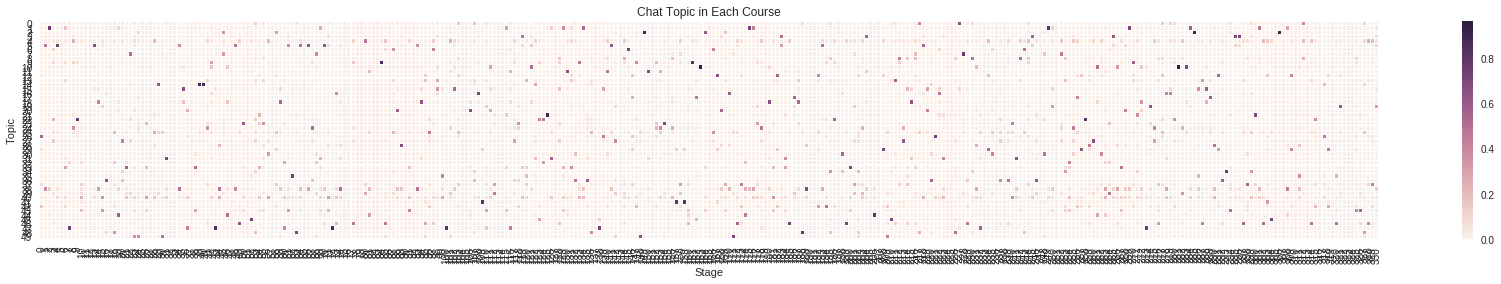

Stage1 (top topic: [26 42 37])
Stage2 (top topic: [ 5 38 40])
Stage3 (top topic: [ 1 38 10])
Stage4 (top topic: [22 27  6])
Stage5 (top topic: [ 5 40  4])
Stage6 (top topic: [49 12 22])
Stage7 (top topic: [33  1 13])
Stage8 (top topic: [47 32  0])
Stage9 (top topic: [24  4  9])
Stage10 (top topic: [22  9 25])
Stage11 (top topic: [40 43 37])
Stage12 (top topic: [49 12 22])
Stage13 (top topic: [49 12 22])
Stage14 (top topic: [ 5 40 15])
Stage15 (top topic: [18 38 15])
Stage16 (top topic: [40 43 19])
Stage17 (top topic: [36 48 16])
Stage18 (top topic: [49 12 22])
Stage19 (top topic: [48 25 32])
Stage20 (top topic: [44 38  1])
Stage21 (top topic: [27 36 34])
Stage22 (top topic: [33 40 39])
Stage23 (top topic: [ 7 39 27])
Stage24 (top topic: [49 40  4])
Stage25 (top topic: [49  2 24])
Stage26 (top topic: [49 12 22])
Stage27 (top topic: [40 23 33])
Stage28 (top topic: [49 12 22])
Stage29 (top topic: [25  4 40])
Stage30 (top topic: [14 25 39])
Stage31 (top topic: [49 25 40])
Stage32 (top topi

In [20]:
import matplotlib
import scipy
import matplotlib.pyplot as plt
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import seaborn as sns
import lda

corpus = sentences
  
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
weight = X.toarray()

def plot_topic_words(topic_word):
    plt.figure(figsize=(8, 9))
    # f, ax = plt.subplots(5, 1, sharex=True)
    for i, k in enumerate([0, 5, 9, 14, 19]):
        ax = plt.subplot(5, 1, i+1)
        ax.plot(topic_word[k, :], 'r-')
        ax.set_xlim(-50, 4350)   # [0,4258]
        ax.set_ylim(0, 0.08)
        ax.set_ylabel(u"概率")
        ax.set_title(u"主题 {}".format(k))
    plt.xlabel(u"词", fontsize=14)
    plt.tight_layout()
    plt.suptitle(u'主题的词分布', fontsize=18)
    plt.subplots_adjust(top=0.9)
    plt.show()

def plot_topic(doc_topic):
    f, ax = plt.subplots(figsize=(30, 4))
    cmap = sns.cubehelix_palette(start=1, rot=3, gamma=0.8, as_cmap=True)
    sns.heatmap(doc_topic.T, linewidths=0.05, ax=ax)
    ax.set_title('Chat Topic in Each Course')
    ax.set_xlabel('Stage')
    ax.set_ylabel('Topic')
    plt.show()
    #f.savefig('output/topic_heatmap.jpg', bbox_inches='tight')


def lda_train(weight, vectorizer):
    model = lda.LDA(n_topics=50, n_iter=100, random_state=1)
    model.fit(weight)

    doc_num = len(weight)
    topic_word = model.topic_word_
    vocab = vectorizer.get_feature_names()
    titles = ["Stage{}".format(i) for i in range(1, doc_num + 1)]

    n_top_words = 20
    #for i, topic_dist in enumerate(topic_word):
      #print(np.sort(topic_dist))
        #topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1]
        #print('Topic {}: {}'.format(i, ' '.join(topic_words)))

    doc_topic = model.doc_topic_
    
    for index in range(len(doc_topic)):
      score = doc_topic[index]
      course = courseList[index]
      captionDict[course]['score'] = score
   
    print(doc_topic, type(doc_topic))
    plot_topic(doc_topic)
    for i in range(doc_num):
        print("{} (top topic: {})".format(titles[i], np.argsort(doc_topic[i])[:-4:-1]))

lda_train(weight, vectorizer)



In [11]:
from sklearn.preprocessing import normalize

watchWeight = 1
infoWeight = 0.3

userTopicVectorDict = dict()

def vecAdd(vec1, vec2):
  
  vec3 = vec1
  len1 = len(vec1)
  len2 = len(vec2)
  if len1 == len2:
    for i in range(len1):
      vec3[i] += vec2[i]
  else:
    print(len1, len2)
  return vec3

def vecMutify(vec1, scale):
  
  vec2 = vec1
  len1 = len(vec1)
  
  for i in range(len1):
    vec2[i] *= scale

  return vec2

def normalized(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

for user in userOperationDict:
  
  userTopicVector = []
  
  for i in range(50):
    userTopicVector.append(0)
    
  userTopicVectorDict[user] = userTopicVector

  for course in userOperationDict[user]:
    
    watchNum = 0
    if 'watch' in userOperationDict[user][course]:
      watchNum = userOperationDict[user][course]['watch']
      
    introNum = 0
    if 'intro' in userOperationDict[user][course]:
      introNum = userOperationDict[user][course]['intro']
    
    #print(course)
    if course in captionDict:
      
      scale = watchNum * watchWeight + introNum * infoWeight
      
      courseTopicVector = vecMutify(captionDict[course]['score'], scale)
      #print(userTopicVectorDict[user])
      userTopicVectorDict[user] = vecAdd(userTopicVectorDict[user], courseTopicVector)
    
for user in userTopicVectorDict:
  
  vecSum = 0
  
  for index in range(50):
    vecSum += userTopicVectorDict[user][index]
  
  if vecSum > 0:
    x = userTopicVectorDict[user]
    userTopicVectorDict[user] = normalized(x)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2286: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2287: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [27]:
from scipy import spatial
from numpy import *
import json

output = open('/content/drive/My Drive/LDA Recommendation/simPair.csv','w')

distanceDict = dict()

userNum = 100

counter = 0

users = list(userTopicVectorDict.keys())[0:100]

for indexA in range(100):
  
  userA = users[indexA]
  
  counter += 1
  
  if counter % 10 == 0:
    print(counter / userNum)
    
  #for indexB in range(1000):
  for userB in userTopicVectorDict:
    
    #userB = users[indexB]
    if userA != userB:
      
      head = userA + '|' + userB
      vecA = userTopicVectorDict[userA]
      vecB = userTopicVectorDict[userB]
      
      vecA = np.nan_to_num(vecA)
      vecB = np.nan_to_num(vecB)
      
      sim = 1 - spatial.distance.cosine(vecA, vecB)
      
      if np.isnan(sim):
        sim = 0
      
      if userA in distanceDict:
        distanceDict[userA][userB] = sim
      else:
        distanceDict[userA] = dict()
        distanceDict[userA][userB] = sim
  
for key in distanceDict:
  print(distanceDict[key])
  break

  
for userA in distanceDict:
  for userB in distanceDict[userA]:
    output.write(userA + ',' +  userB + ',' + str(distanceDict[userA][userB]) + '\n')


/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
{'6740853': 0.19348562839380512, '1113': 0.00697232222307087, '6690190': 0.0939776851946631, '6928712': 0, '3001487': 0.21002610621338258, '7045334': 0.01576406918715456, '7049054': 0.1764876577816863, '6925339': 0.1039567004015105, '7049993': 0.030933250155363634, '7048647': 0.01922549938212703, '6860698': 0.2777140854502149, '1197649': 0.22646396131479662, '1470832': 0, '6338151': 0, '6928957': 0.0019435117343304942, '7042847': 0.2777140854502149, '6775349': 0.08037499753538013, '6674009': 0, '7049388': 0.0818257758675136, '7050180': 0, '6775288': 0, '6826359': 0.01576406918715456, '7048895': 0.13829741344782698, '6935400': 0, '1083713': 0.2335935092108381, '1645396': 0, '6896560': 0.0050295409765857, '7048850': 0, '5249532': 0.11711246804008135, '6585232': 0, '6584275': 0.13160391441003727, '4441479': 0.19588468661309366, '6247692': 0.004696202342895361, '739490': 0.08037499753538013, '6884390': 0, '1401532': 0.06095799583412198, '6814626': 0,

In [47]:
#相似用户

focusUser = '6938650'

simArray = list(distanceDict[focusUser].values())
userArray = list(distanceDict[focusUser].keys())

maxVal = 0
maxIndex = -1

for index in range(len(simArray)):
  val = simArray[index]
  if val > maxVal:
    maxVal = val
    maxIndex = index
    
simUser = userArray[maxIndex]

print('Focus user: ' + focusUser)
    
print('Most similar user: ' + simUser)

print('Detail of focus user------------------------------')

print(userOperationDict[focusUser])

print('Detail of siminary user----------------------------')

print(userOperationDict[simUser])

print('--------------------------------------------------')

Focus user: 6938650
Most similar user: 1542379
Detail of focus user------------------------------
{'TsinghuaX+00701032X': {'intro': 8, 'watch': 16}}
Detail of siminary user----------------------------
{'TsinghuaX+00701032X': {'watch': 155}, 'TsinghuaX+00690242X_p2': {'watch': 1}, 'TsinghuaX+00612643X': {'watch': 1}, 'TsinghuaX+400182X': {'watch': 21}, 'TsinghuaX+40670453X_p4': {'watch': 21}, 'TsinghuaX': {'watch': 1}}
--------------------------------------------------


In [46]:
# 课程推荐

similaryUserCourses = userOperationDict[simUser]
candicatesList = []

for course in similaryUserCourses:
  watchNum = 0
  introNum = 0
  if 'watch' in similaryUserCourses[course]:
    watchNum = similaryUserCourses[course]['watch']
    
  if 'intro' in similaryUserCourses[course]:
    introNum = similaryUserCourses[course]['intro']

  interestWeight = watchNum + introNum * 0.3
  courseInfo = dict()
  courseInfo['name'] = course
  courseInfo['weight'] = interestWeight
  candicatesList.append(courseInfo)
  
recommendationList = sorted(candicatesList, key=lambda k: k['weight'], reverse=True)[0:3]

print('------------------------Recommendations------------------------------')
print(recommendationList)

------------------------Recommendations------------------------------
[{'name': 'TsinghuaX+00701032X', 'weight': 155.0}, {'name': 'TsinghuaX+400182X', 'weight': 21.0}, {'name': 'TsinghuaX+40670453X_p4', 'weight': 21.0}]
